In [83]:
import numpy as np
import cv2
import glob

In [84]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,30,0.001)

In [85]:
n = 7
m = 10
objp = np.zeros((n*m,3),np.float32)
objp[:,:2] = np.mgrid[0:n,0:m].T.reshape(-1,2)

In [86]:
objpoints = []
imgpoints = []
images = glob.glob('.\Calibration\iphone\*.png')

In [87]:
len(images)

21

In [88]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(n,m),None)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        img = cv2.drawChessboardCorners(img,(n,m),corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(3000)
cv2.destroyAllWindows()

## calibration

In [89]:
cv2.imwrite('corners.png',img)

True

In [90]:
ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)

In [91]:
len(imgpoints)

21

In [92]:
imgpoints[20].shape

(70, 1, 2)

In [93]:
np.transpose(imgpoints[20])

array([[[357.65994, 401.3985 , 444.26553, 486.9536 , 529.54047,
         572.185  , 614.59406, 358.3732 , 401.5769 , 444.31573,
         486.6133 , 528.88446, 571.3093 , 613.551  , 358.55298,
         401.71143, 444.3409 , 486.4926 , 528.46967, 570.4415 ,
         612.60114, 358.8433 , 401.93152, 444.3462 , 486.40073,
         528.0411 , 569.74457, 611.86615, 359.2974 , 402.23984,
         444.27112, 486.12082, 527.59753, 569.4205 , 611.36633,
         359.44186, 402.19662, 444.18054, 485.7584 , 527.3958 ,
         568.83826, 610.70764, 358.9698 , 401.65228, 443.58383,
         485.36383, 526.6108 , 568.2981 , 609.90063, 358.6491 ,
         401.3937 , 443.33752, 484.71518, 526.25977, 567.59174,
         609.39215, 358.4818 , 400.94208, 442.76495, 484.52545,
         525.85144, 567.473  , 609.07043, 357.99738, 400.46536,
         442.37823, 484.1397 , 525.5332 , 567.00305, 608.5582 ]],

       [[178.76949, 179.56886, 180.45358, 181.0809 , 181.51468,
         181.76701, 182.37553, 222.48

In [94]:
from matplotlib import pyplot as plt

In [95]:
len(objpoints)

21

In [96]:
objpoints[20].shape

(70, 3)

In [97]:
np.transpose(objpoints[20])

array([[0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0., 1.,
        2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3.,
        4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5.,
        6., 0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0.,
        1., 2., 3., 4., 5., 6.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4.,
        4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6.,
        6., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8., 9.,
        9., 9., 9., 9., 9., 9.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [98]:
ret

0.6764049613840599

In [99]:
mtx

array([[923.64587715,   0.        , 421.21314957],
       [  0.        , 920.66793219, 406.67688213],
       [  0.        ,   0.        ,   1.        ]])

In [100]:
dist

array([[-4.06677446e-01,  4.48414462e+00, -6.59768043e-05,
         1.01092441e-03, -1.79392604e+01]])

In [101]:
len(rvecs)

21

In [102]:
len(tvecs)

21

In [103]:
img = cv2.imread('./\Calibration\iphone\sIMG_3538.png')
h,w = img.shape[:2]
newcameramtx,roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [104]:
dst = cv2.undistort(img,mtx,dist,None,newcameramtx)
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

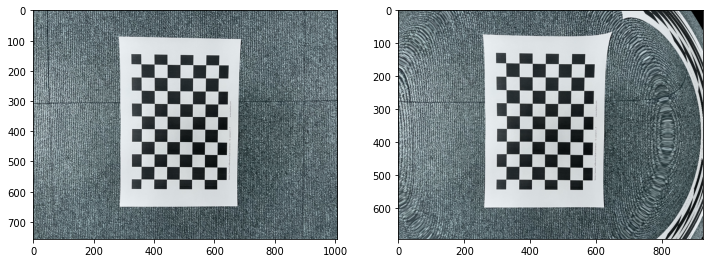

In [105]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(dst)
plt.show()

In [106]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [107]:
def drawBox(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

In [108]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((n*m,3), np.float32)
objp[:,:2] = np.mgrid[0:n,0:m].T.reshape(-1,2)

In [109]:
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
axisBox = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],[0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

In [110]:
for fname in glob.glob('.\Calibration\iphone\*.png'):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (n,m),None)
    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret,rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
        img = draw(img,corners2,imgpts)
        cv2.imshow('img',img)
        k = cv2.waitKey(0) & 0xff
        if k == 's':
            cv2.imwrite(fname[:6]+'.png', img)
cv2.destroyAllWindows()

<ipython-input-106-2943238ddec0>:3: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
<ipython-input-106-2943238ddec0>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
<ipython-input-106-2943238ddec0>:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)


In [111]:
for fname in glob.glob('.\Calibration\iphone\*.png'):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (n,m),None)
    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret,rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axisBox, rvecs, tvecs, mtx, dist)
        img = drawBox(img,corners2,imgpts)
        cv2.imshow('img',img)
        k = cv2.waitKey(0) & 0xff
        if k == 's':
            cv2.imwrite(fname[:6]+'.png', img)
cv2.destroyAllWindows()